In [1]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt 
"""
TODOS: 
1) Get the dataset and read it in 
2) Keyword search for emotional value 
3) Emotional Value Classification 
"""

In [46]:
tweets_data_path = 'tweetdata.txt'

tweets_data = []
tweets_file = open(tweets_data_path,'r')
for line in tweets_file: 
    try:  
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue 
print(len(tweets_data))
sent = pd.read_excel('sentiment2.xlsx')
print("Data Head: ", sent.head())
print(sent['id'])
print('Sent data length: ', len(sent))

x = []
y = []
for i in range(len(tweets_data)): 
    if(tweets_data[i]['id']==sent['id'][i]): 
        x.append(tweets_data[i]['text'])
        y.append(sent['sentiment'][i])
print(x[0].split(" "))
 

3574
Data Head:                     id  sentiment
0  870430762255953920         -1
1  870430770141253632         -1
2  870430771592413187         -1
3  870430772800479233         -1
4  870430776432644096          1
0       870430762255953920
1       870430770141253632
2       870430771592413187
3       870430772800479233
4       870430776432644096
               ...        
3569    870439971378798592
3570    870439972490358785
3571    870439973551353856
3572    870439974159745024
3573    870439980392484864
Name: id, Length: 3574, dtype: int64
Sent data length:  3574
['Hey,', 'look', '-', 'I', 'found', 'my', 'social', 'anxiety', 'again.', 'Was', 'wondering', 'where', 'that', 'went.']


In [16]:
emotional_keywords = ['anxiety','depression','sad','mad','anger', 'happy']
def dict_search(keywords,sentenceList):
    count = dict() 
    
    for sentence in sentenceList: 
        for key in emotional_keywords: 
            if key in sentence:
                if key in count: 
                    count[key] += 1
                else: 
                    count[key] = 1
    return count 

{'anxiety': 237, 'depression': 241, 'mad': 14, 'sad': 9, 'happy': 8, 'anger': 3}


<BarContainer object of 6 artists>

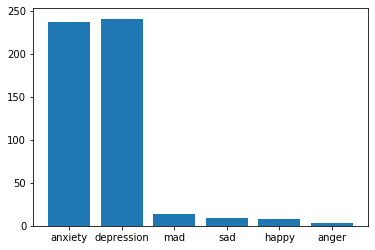

In [17]:
word_counts = dict_search(emotional_keywords,x[1:1000])
print(word_counts)
plt.bar(word_counts.keys(),word_counts.values())

In [23]:
"Section for Neural Network Architechture"
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics 

vectorizer = CountVectorizer(stop_words='english')


actual = y[:-500]
nb = MultinomialNB() 
nb.fit(train_features,[int(r) for r in y])
test_features = vectorizer.transform(x[:-500])
test_try = vectorizer.transform(["Can we all treating anxiety like it's choice"])
test_try2 = vectorizer.transform(["I want to die depression sucks"])
predict = nb.predict(test_try)
predict2 = nb.predict(test_try2)

predictions = nb.predict(test_features)
fpr, tpr , thresholds = metrics.roc_curve(actual,predictions,pos_label=1)
print("Multinomal naive bayes AUC: {0}".format(metrics.auc(fpr,tpr)))
print(predict)
print(predict2)


Multinomal naive bayes AUC: 0.9589814677219942
[1]
[-1]


In [43]:
def classifysentence(sentence,model,emdict): 
    emotion = ""
    
    predict = vectorizer.transform(sentence)
    prediction = model.predict(predict)
    for key in emdict:
        if key in sentence[0]: 
            emotion = key
    return [prediction[0], emotion]

res = classifysentence(["I feel really sad today"],nb,emotional_keywords)
print(res)

[-1, 'sad']


In [44]:
from joblib import dump, load 

In [45]:
dump(nb,"sentiment_analyzer.joblib")

['sentiment_analyzer.joblib']

In [48]:
model = load('sentiment_analyzer.joblib')
sentence = ["I am sad"]
vector = vectorizer.transform(sentence)
prediction = model.predict(vector)
print(prediction)

[-1]
